In [1]:
from sympy import *


# 核心决策自变量
x, y, z = symbols('x y z')
# 区块链相关参数
M_1, M_2, P, S = symbols('M_1 M_2 P S')
C_1, C_2, C_3, C_4 = symbols('C_1 C_2 C_3 C_4')
R_1, R_2 = symbols('R_1 R_2')
# 医疗事故相关
L_1, L_2 = symbols('L_1 L_2')
H = symbols('H')
F, a_1, a_2 = symbols('F a_1 a_2')

In [2]:
# 定义矩阵元素
# 关于下标：前三位数字的0代表负向决策，最后一位数字123分别代表患者/医院/政府
F_1111 = P - a_1*(L_1) - M_1    # Mark
F_1112 = (S+R_1)-C_1 - a_1*(H+F)
F_1113 = R_2+a_1*F-C_3
F_0111 = - a_1*(L_2)
F_0112 = S-C_1 - a_1*(H+F)
F_0113 = a_1*F-C_3
F_1101 = P - a_1*(L_1) - M_1    # Mark
F_1102 = R_1-C_1 - a_1*(H+F)
F_1103 = a_1*F-C_4
F_0101 = - a_1*(L_2)
F_0102 = -C_1 - a_1*(H+F)
F_0103 = a_1*F-C_4

F_1011 = P - a_2*(L_1) - M_2    # Mark
F_1012 = R_1-C_2 - a_2*(H+F)
F_1013 = a_2*F-C_3
F_0011 = - a_2*(L_2)
F_0012 = -C_2 - a_2*(H+F)
F_0013 = a_2*F-C_3
F_1001 = P - a_2*(L_1) - M_2    # Mark
F_1002 = R_1-C_2 - a_2*(H+F)
F_1003 = a_2*F-C_4
F_0001 = - a_2*(L_2)
F_0002 = -C_2 - a_2*(H+F)
F_0003 = a_2*F-C_4

In [3]:
# 计算单独收益 - 患者
U_1 = z*y*F_1111\
    +z*(1-y)*F_1011\
    +y*(1-z)*F_1101\
    +(1-z)*(1-y)*F_1001
U_2 = z*y*F_0111\
    +z*(1-y)*F_0011\
    +y*(1-z)*F_0101\
    +(1-z)*(1-y)*F_0001
# 计算单独收益 - 医院
V_1 = z*x*F_1112\
    +z*(1-x)*F_0112\
    +x*(1-z)*F_1102\
    +(1-z)*(1-x)*F_0102
V_2 = z*x*F_1012\
    +z*(1-x)*F_0012\
    +x*(1-z)*F_1002\
    +(1-z)*(1-x)*F_0002
# 计算单独收益 - 政府
W_1 = y*x*F_1113\
    +y*(1-x)*F_0113\
    +x*(1-y)*F_1013\
    +(1-y)*(1-x)*F_0013
W_2 = y*x*F_1103\
    +y*(1-x)*F_0103\
    +x*(1-y)*F_1003\
    +(1-y)*(1-x)*F_0003

In [7]:
# 计算复制动态方程
F_x = factor(x*(1-x)*(U_1-U_2))
F_y = factor(y*(1-y)*(V_1-V_2))
F_z = factor(z*(1-z)*(W_1-W_2))

In [ ]:
# 计算雅可比矩阵J的各维度元素
J_11 = factor(diff(F_x, x))
J_12 = factor(diff(F_x, y))
J_13 = factor(diff(F_x, z))

J_21 = factor(diff(F_y, x))
J_22 = factor(diff(F_y, y))
J_23 = factor(diff(F_y, z))

J_31 = factor(diff(F_z, x))
J_32 = factor(diff(F_z, y))
J_33 = factor(diff(F_z, z))

In [17]:
print("J_11:",J_11)
print("J_12:",J_12)
print("J_13:",J_13)

print("J_21:",J_21)
print("J_22:",J_22)
print("J_23:",J_23)

print("J_31:",J_31)
print("J_32:",J_32)
print("J_33:",J_33)

J_11: (2*x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)
J_12: x*(x - 1)*(L_1*a_1 - L_1*a_2 - L_2*a_1 + L_2*a_2 + M_1 - M_2)
J_13: 0
J_21: 0
J_22: -(2*y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z)
J_23: -S*y*(y - 1)
J_31: -R_2*y*z*(z - 1)
J_32: -R_2*x*z*(z - 1)
J_33: -(2*z - 1)*(-C_3 + C_4 + R_2*x*y)


In [32]:
# 使用 subs 方法替换 x, y, z 的值
xyz_dict = {x: 1, y: 0, z: 0}
J_11_subs = J_11.subs(xyz_dict)
J_22_subs = J_22.subs(xyz_dict)
J_33_subs = J_33.subs(xyz_dict)
# 计算表达式的值
result_J_11 = J_11_subs.evalf()
result_J_22 = J_22_subs.evalf()
result_J_33 = J_33_subs.evalf()
print("J_11:",result_J_11)
print("J_22:",result_J_22)
print("J_33:",result_J_33)

J_11: L_1*a_2 - L_2*a_2 + M_2 - P
J_22: -C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2
J_33: -C_3 + C_4


In [33]:
print("F_x:",F_x)
print("F_y:",F_y)
print("F_z:",F_z)

F_x: x*(x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)
F_y: -y*(y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z)
F_z: -z*(z - 1)*(-C_3 + C_4 + R_2*x*y)


In [219]:
"""
function dxdt=differential(x,t)
dxdt=[x(1)*(1-x(1))*(-0.2-x(2)*x(3)),x(2)*(1-x(2))*(-0.2-x(1)*x(3)),x(3)*(1-x(3))*(0.2-x(2)*x(1))]
end
"""
import warnings
warnings.filterwarnings("ignore")
from numpy import arange 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

R_2 = 10
C_3 = 10
C_4 = 6
# (a_2-a_1)(H+F) vs. C_1-C_2 vs. (a_2-a_1)(H+F)+S
a_1 = 0.03
a_2 = 0.05
H   = 100
F   = 500
S   = 7
C_1 = 20
C_2 = 5

R_1 = 10

# a_1(L_2-L_1)+P vs. M1
# a_2(L_2-L_1)+P vs. M2
P   = 1
L_2 = 700
L_1 = 500
M_1 = 5
M_2 = 8

model_args = (P, M_1, M_2, L_1, L_2, a_1, a_2, R_1, R_2, S, C_1, C_2, C_3, C_4, H, F)

In [223]:
model_args

(1, 5, 8, 500, 700, 0.03, 0.05, 10, 10, 7, 20, 5, 10, 6, 100, 500)

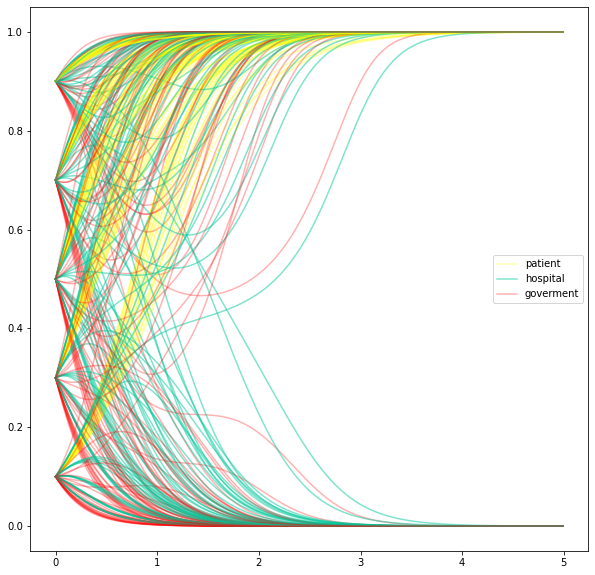

In [224]:
def model(V, t, P, M_1, M_2, L_1, L_2, a_1, a_2, R_1, R_2, S, C_1, C_2, C_3, C_4, H, F):
    x, y, z = V.tolist()
    return np.array([(x*(x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)),\
            -y*(y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z),\
            -z*(z - 1)*(-C_3 + C_4 + R_2*x*y)
                    ])
            
fig = plt.figure(figsize=(10,10))
t = np.arange(0, 5, 0.01)
for i in arange(0.1, 1, 0.2):
    for j in arange(0.1, 1, 0.2):
        for k in arange(0.1, 1, 0.2):
            xyz_init = [i,j,k]
            sol = odeint(model, xyz_init, t, model_args)
            plt.plot(t, sol.T[0,:],c=plt.get_cmap('spring')(800), alpha=0.3)
            plt.plot(t, sol.T[1,:],c=plt.get_cmap('winter')(200), alpha=0.5)
            plt.plot(t, sol.T[2,:],c=plt.get_cmap('autumn')(2), alpha=0.3)
plt.legend(labels=('patient','hospital','goverment'))
plt.show()

No handles with labels found to put in legend.


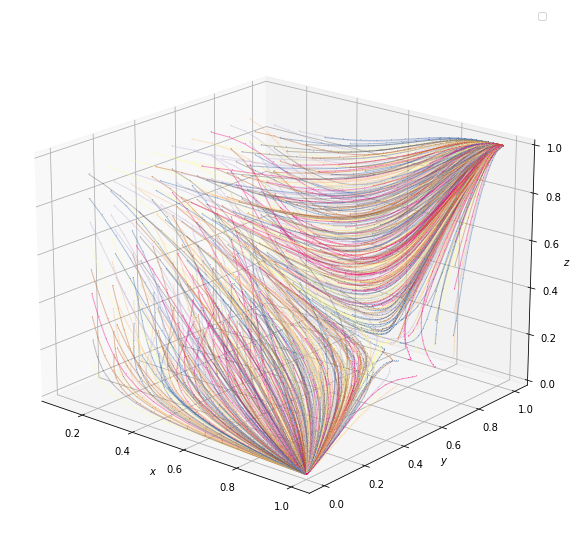

In [148]:
def phase_diagram():
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import random
    from scipy.integrate import odeint 
    from matplotlib import colors

    plt.rcParams['axes.unicode_minus']=False
    plt.close("all") # 防止刷屏
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    t = arange(1, 20, 0.1) 
    # color=["#C5E0B4","#FFE699","#FEB98A","#DAE3F3"]
    xyz_par_lt = []
    for i in [i for i in arange(0.1,1,0.1)]:
        for j in [i for i in arange(0.1,1,0.1)]:
                 for k in [i for i in arange(0.1,1,0.1)]:
                    xyz_par_lt.append([i,j,k])

    def model(V, t, P, M_1, M_2, L_1, L_2, a_1, a_2, R_1, R_2, S, C_1, C_2, C_3, C_4, H, F):
        x, y, z = V.tolist()
        return np.array([(x*(x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)),\
                -y*(y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z),\
                -z*(z - 1)*(-C_3 + C_4 + R_2*x*y)
                        ])
    for xyz in xyz_par_lt:
        color_from_cmap = plt.get_cmap('Accent')(random.randint(1,7))
        sol = odeint(model, xyz, t, model_args)
        X,Y,Z = sol.T[0,:],sol.T[1,:],sol.T[2,:]
        ax.plot(X,Y,Z,'go-',zdir="z",color=color_from_cmap,marker=",",linewidth=1, alpha=0.4) 
    ax.view_init(elev=20, azim=-50)
    ax.set_xlabel(r"$x$",labelpad=0)
    ax.set_ylabel(r"$y$",labelpad=0)
    ax.set_zlabel(r"$z$",labelpad=0)
    ax.set_facecolor('w')
    ax.legend()
    plt.show()

In [154]:
#导入必要的包

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

#定义字体防止图象中的字体显示为方框
plt.rcParams['font.sans-serif']=['STSong']
#plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#%%复制动态方程组
def yaopin(Fx,t,Rp,Cph,Cpl,Cp,Bt,Fp,Mp,Ct,Ft,Mt,Cg,Tg):
    x, y, z = Fx.tolist()
    return x*(x-1)*(Cph-Cpl-Cp-Bt-y*(Rp-Bt)-z*(Fp+Mp)), \
 y*(y-1)*((1-x)*(Bt-Mt)-(Ft+Mt)*z-Ct), \
 z*(z-1)*(Cg-Fp-Ft-Tg+(Mp+Fp+Tg)*x+(Mt+Ft+Tg)*y-Tg*x*y)
fig, ax = plt.subplots()
t = np.arange(0, 1, 0.001)
args=(150,85,0,10,40,40,20,10,20,15,15,40)
track1 = odeint(yaopin, (0.2, 0.2, 0.2), t,args )
plt.plot(t, track1[:,0], 'r>',markevery=2,markerfacecolor="None")
plt.plot(t, track1[:,1], 'g*',markevery=10)
plt.plot(t, track1[:,2], 'b--',markevery=10)
plt.xticks(np.arange(0,1.01,step=0.2))
plt.yticks(np.arange(0,1.01,step=0.2))
plt.legend(labels=('x=0.2','y=0.2','z=0.2'))
ax.set_xlabel("t",labelpad=-5)
ax.set_ylabel("x0/y0/z0",labelpad=-5)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.title("图1  "+r'$x$'+'、'+r'$y$'+'、'+r'$z$'+"不同时的演化仿真图", y=-0.15)
plt.grid(True)
plt.show()